# Introduction

[Yamaguchi et al 2017](http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1710.09839) estimated the number of binaries with a black hole and a stellar companion which will be detected by the [Gaia mission](http://sci.esa.int/gaia/). In this notebook we want to check whether their model reproduces the non detection of such binaries by the [hipparcos mission](http://sci.esa.int/hipparcos/).

Loading libraries and setting up environment

In [66]:
import sympy
import numpy
sympy.init_printing()

# Reproducing Paper Results

As a first step, we try to reproduce the results in the paper, specifically, table 2. We start with the integrand of the huge integral in equation 15.

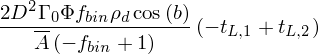

In [43]:
f_bin = sympy.Symbol('f_bin') # Binary fraction
Gamma_0 = sympy.Symbol('Gamma_0') # Slope of binary separation pdf
Phi = sympy.Symbol('Phi') # Mass ratio distribution
t_L1 = sympy.Symbol(r't_{L,1}') # Lifetime of the star that collapsed to a black hole
t_L2 = sympy.Symbol(r't_{L,2}') # Lifetime of the companion
A_bar = sympy.Symbol('\overline{A}') # Separation between stars
b = sympy.Symbol('b') # Viewing angle relative to galactic plane
D = sympy.Symbol('D') # Distance from Earth
rho_d = sympy.Symbol('rho_d') # Star formation number density
eqn_15_integrand_raw = (2*f_bin/(1-f_bin))*Gamma_0*Phi*(t_L2-t_L1)*(1/A_bar)*sympy.cos(b)*D**2*rho_d
eqn_15_integrand_raw

## Spatial distribution of stars

Bahcall Soniera star formation number density (equation 11)

In [44]:
Psi = sympy.Symbol('Psi')
rho_d0 = sympy.Symbol(r'\rho_{d,0}') # Normalisation factor
z = sympy.Symbol('z') # Distance from the galactic plane
h_z = sympy.Symbol('h_z', positive=True) # Scale height of the galactic disc
x = sympy.Symbol('x') # Distance from the rotational axis of the galaxy
r_0 = sympy.Symbol('r_0') # Distance between the sun and the galactic centre
h_r = sympy.Symbol('h_r', positive=True) # Scale radius of the galaxy
eqn_11 = sympy.Eq(rho_d,Psi*rho_d0*sympy.exp(-z/h_z-(x-r_0)/h_r))
eqn_11

Definition of the normalisation (equation 12)

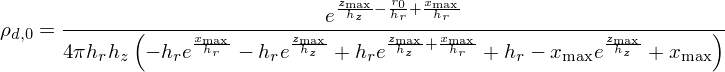

In [45]:
x_max = sympy.Symbol(r'x_{\max}')
z_max = sympy.Symbol(r'z_{\max}')
temp = eqn_11.rhs/ Psi
temp = sympy.integrate(4*sympy.pi*x*temp,(z,0,z_max),(x,0,x_max)).simplify()
eqn_12 = sympy.Eq(rho_d0,sympy.solve(temp-1,rho_d0)[0])
eqn_12

Actually, the bounds $x_{\max}$ and $z_{\max}$ are not defined in the paper, so I assume $x_{\max}, z_{\max} \rightarrow \infty$

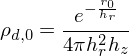

In [46]:
temp = eqn_11.rhs/Psi*4*sympy.pi*x
temp = sympy.integrate(temp, (z, 0, sympy.oo))
temp = sympy.integrate(temp, (x, 0, sympy.oo))
temp = sympy.solve(temp-1,rho_d0)[0]
eqn_12_var = sympy.Eq(rho_d0, temp)
eqn_12_var

Geocentric coordinates

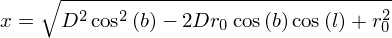

In [47]:
l = sympy.Symbol('l') # Viewing angle relative to the rotation axis of the galaxy
eqn_13 = sympy.Eq(x,sympy.sqrt(r_0**2+D**2*sympy.cos(b)**2-2*D*r_0*sympy.cos(b)*sympy.cos(l)))
eqn_13

In [48]:
eqn_14 = sympy.Eq(z, D*sympy.sin(b))
eqn_14

## Initial mass function

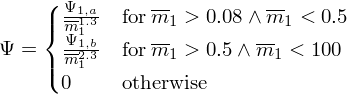

In [49]:
Psi_1a = sympy.Symbol(r'\Psi_{1,a}') # Coefficient
Psi_1b = sympy.Symbol(r'\Psi_{1,b}') # Coefficient
M_sol = sympy.Symbol('M_{\odot}')
M_1_bar = sympy.Symbol(r'\overline{M}_1')
m_1_bar = sympy.Symbol(r'\overline{m}_1') # M_1_bar divided by a solar mass
temp = sympy.Piecewise((Psi_1a*m_1_bar**(-1.3), sympy.And(m_1_bar < 0.5, m_1_bar>0.08)),
                       (Psi_1b*m_1_bar**(-2.3), sympy.And(m_1_bar>0.5, m_1_bar<100)),
                      (0,True))
eqn_1 = sympy.Eq(Psi, temp)
eqn_1

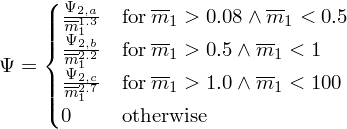

In [50]:
Psi_2a = sympy.Symbol(r'\Psi_{2,a}') # Coefficient
Psi_2b = sympy.Symbol(r'\Psi_{2,b}') # Coefficient
Psi_2c = sympy.Symbol(r'\Psi_{2,c}') # Coefficient
temp = sympy.Piecewise((Psi_2a*m_1_bar**(-1.3), sympy.And(m_1_bar < 0.5, m_1_bar>0.08)),
                       (Psi_2b*m_1_bar**(-2.2), sympy.And(m_1_bar>0.5, m_1_bar<1)),
                      (Psi_2c*m_1_bar**(-2.7), sympy.And(m_1_bar>1.0, m_1_bar<100)),
                      (0,True))
eqn_2 = sympy.Eq(Psi,temp)
eqn_2

The coefficients can be determined by continuity and normalisation condition

In [51]:
cond_1 = sympy.Eq(eqn_1.rhs.subs(m_1_bar,0.5-1e-6),eqn_1.rhs.subs(m_1_bar,0.5+1e-6))
cond_1

In [52]:
Upsilon = sympy.Symbol('Upsilon') # Star formation rate in the entire galaxy, roughly 3.5 M_sol/year
temp = sympy.integrate(eqn_1.rhs*m_1_bar,m_1_bar)
temp = ((temp.subs(m_1_bar, 0.5-1e-6) - temp.subs(m_1_bar, 0.08+1e-6))+
        (temp.subs(m_1_bar, 100-1e-6) - temp.subs(m_1_bar, 0.5+1e-6)))
cond_2 = sympy.Eq(temp, Upsilon)
cond_2

In [53]:
eqn_1_coefficients = sympy.solve([cond_1, cond_2], [Psi_1a, Psi_1b])
eqn_1_coefficients

In [54]:
cond_3 = sympy.Eq(eqn_2.rhs.subs(m_1_bar,0.5-1e-6), eqn_2.rhs.subs(m_1_bar, 0.5+1e-6))
cond_3

In [55]:
cond_4 = sympy.Eq(eqn_2.rhs.subs(m_1_bar,1-1e-6), eqn_2.rhs.subs(m_1_bar, 1+1e-6))
cond_4

In [56]:
temp = sympy.integrate(eqn_2.rhs*m_1_bar, m_1_bar)
temp = ((temp.subs(m_1_bar,0.5-1e-6) - temp.subs(m_1_bar,0.08+1e-6))+
       (temp.subs(m_1_bar,1.0-1e-6) - temp.subs(m_1_bar,0.5+1e-6))+
       (temp.subs(m_1_bar,100-1e-6) - temp.subs(m_1_bar,1+1e-6)))
cond_5 = sympy.Eq(temp, Upsilon)
cond_5

In [57]:
eqn_2_coefficients = sympy.solve([cond_3, cond_4, cond_5], [Psi_2a, Psi_2b, Psi_2c])
eqn_2_coefficients

## Distribution of mass ratios

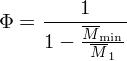

In [58]:
M_min_bar = sympy.Symbol(r'\overline{M}_{\min}')
eqn_3 = sympy.Eq(Phi, 1/(1-M_min_bar/M_1_bar))
eqn_3

## Distribution of semi major axes

Minimum semimajor axis

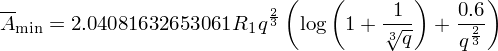

In [59]:
A_bar_min = sympy.Symbol(r'\overline{A}_{\min}')
q = sympy.Symbol('q', positive=True) # Mass ratio
R_1 = sympy.Symbol('R_1') # Radios of primary
eqn_7 = sympy.Eq(A_bar_min, 
                 (0.6*q**sympy.Rational(-2,3)+sympy.log(1+q**sympy.Rational(-1,3)))*R_1/(0.49*q**sympy.Rational(-2,3)))
eqn_7

Mass raius relation, from [Demircan and Kahraman 1991](http://adsabs.harvard.edu/abs/1991Ap%26SS.181..313D)

In [60]:
R_sol = sympy.Symbol('R_{\odot}') # Solar radius
mass_radius_relation = 1.61*m_1_bar**0.83*R_sol

Determination of semimajor axes distribution

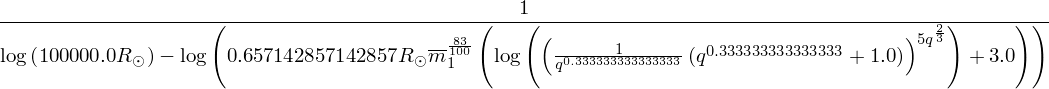

In [61]:
A_bar_max = sympy.Symbol(r'\overline{A}_{\max}')
temp = Gamma_0/A_bar
temp = sympy.integrate(temp, (A_bar, A_bar_min, A_bar_max))
temp = temp.subs(A_bar_max, 1e5*R_sol).subs(eqn_7.lhs, eqn_7.rhs).subs(R_1, mass_radius_relation)
Gamma_0_expr = sympy.solve(temp-1,Gamma_0)[0]
Gamma_0_expr

## Lifetimes

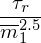

In [62]:
tau_r = sympy.Symbol('tau_r') # Reference lifetime (10 Gy)
lifetime_mass_relation = tau_r*m_1_bar**(-2.5)
lifetime_mass_relation

## Putting it all together

Carrying out the integral in equation 15

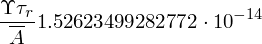

In [63]:
solar_radius_in_pc = 2.25e-8
D_max = sympy.Symbol(r'D_{\max}')
temp = eqn_15_integrand_raw.subs(eqn_11.lhs, eqn_11.rhs).subs(eqn_12_var.lhs, eqn_12_var.rhs)
temp = temp.subs(eqn_13.lhs, eqn_13.rhs)
temp = temp.subs(eqn_14.lhs, eqn_14.rhs)
temp = temp.subs(eqn_3.lhs, eqn_3.rhs)
temp = temp.subs(Gamma_0, Gamma_0_expr)
temp = temp.subs(Psi, eqn_1.rhs.args[1][0])
temp = temp.subs(eqn_1_coefficients)
temp = temp.subs(t_L1,lifetime_mass_relation)
temp = temp.subs(t_L2,lifetime_mass_relation.subs(m_1_bar,m_1_bar*q))
temp = temp.subs(M_min_bar, 0.08*M_sol)
temp = temp.subs(M_1_bar, m_1_bar*M_sol)
temp = temp.subs(h_z, 250)
temp = temp.subs(h_r, 3500)
temp = temp.subs(r_0, 8000)
temp = temp.subs(b, 1)
temp = temp.subs(l, sympy.Rational(1,2))
temp = temp.subs(D, 100)
temp = temp.subs(f_bin, 0.5)
temp = temp.subs(q, 0.1)
temp = temp.subs(R_sol, solar_radius_in_pc)
temp = temp.subs(m_1_bar, 30)
temp.n()

# Step by Step Integration

In this section we break up the integral in equation 15 into different categories, and consider each category separately to obtain insight to the problem. We begin by eliminating the units. From the star formation rate $3.5 \, M_{\odot} / \rm year$, a typical timescale $\tau_r = 10 \, \rm Gyr$ and a typical mass $M_{\odot}$ we obtain the total number of stars $3.5 \cdot 10^{10}$. From this point, each integral filters out the irrelevant stars and reduces this number,

## Primary mass
In this section we filter out all primaries below the necessary mass needed to collapse to a black hole

In [111]:
def integrand_func_mk_1(m1):
    
    if m1<20:
        return 0
    return 3.5e10*0.22*m1**(-2.3)

m_range = numpy.linspace(20,100) # Primary mass range
dm = m_range[1] - m_range[0]
numpy.sum([integrand_func_mk_1(m1) for m1 in m_range])*dm

## Mass ratio

We filter out large companion masses because their lifetime is too short, and low masses because they are too dim

In [116]:
def integrand_func_mk_2(m1, q):

    m2min = 0.4
    if m2min/m1>q:
        return 0
    return integrand_func_mk_1(m1)/(1-m2min/m1)*m1**-2.5*(q**-2.5-1)

m_range = numpy.linspace(20,100) # Range of primary masses
q_range = numpy.linspace(0, 1) # Range of mass ratios
dm = m_range[1] - m_range[0] # Mass interval
dq = q_range[1] - q_range[0] # Mass ratio interval
numpy.sum([[integrand_func_mk_2(m1, q) for m1 in m_range] for q in q_range])*dm*dq

## Semi major axis

In [126]:
def integrand_func_mk_3(m1,q,lnA):
    
    A_max_val = 1e5
    D_ref = 4e10 # Reference distance, 1 kpc in solar radii
    uas = 5e-12 # micro arcsecond in radius
    gaia_angular_res = 300*uas # Gaia angular sensitivity
    A_min_val = 0.66*m1**0.83*(3.0+5*q**0.67*numpy.log(1+q**0.33))
    A_period = 2000 # http://www.wolframalpha.com/input/?i=((solar+mass)*(gravitation+constant)*(5+year)%5E2)%5E(1%2F3)%2F(solar+radius)
    if lnA>numpy.log10(max(A_period, A_max_val)) or lnA<numpy.log10(A_min_val) or lnA<numpy.log10(gaia_angular_res)+numpy.log10(D_ref):
        return 0
    G0_val = 1.0/numpy.log10(A_max_val/A_min_val)
    
    return integrand_func_mk_2(m1,q)*G0_val

m_range = numpy.linspace(20,100,10) # Range of primary masses
q_range = numpy.linspace(0, 1, 10) # Range of mass ratios
lnA_range = numpy.linspace(-1, 5, 10) # Rand of semi - major axis
dm = m_range[1] - m_range[0] # Mass interval
dq = q_range[1] - q_range[0] # Mass ratio interval
dlnA = lnA_range[1] - lnA_range[0] # semi major axis interval
numpy.sum([[[integrand_func_mk_3(m1, q, lnA) for m1 in m_range] 
            for q in q_range]
           for lnA in lnA_range])*dm*dq*dlnA